In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Median Filter

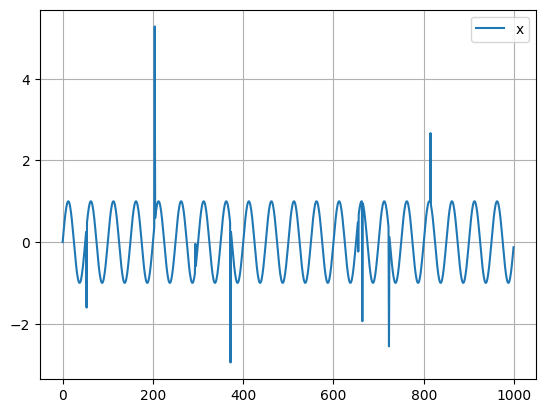

In [139]:
Fs = 1000 # Hz
t = np.arange(0., 1., 1/Fs)
f0 = 20
x = np.sin(2 * np.pi * f0 * t)

# **** add impulsive noise in random places of signal ****
np.random.seed(1234)
n_impulsive_noise = 8
n_noise_position = np.random.randint(0, len(x), n_impulsive_noise)
n_noise_value = np.random.randn(n_impulsive_noise) * 5
x[n_noise_position] = n_noise_value

plt.plot(x, label='x')
plt.legend(); plt.grid(); plt.show()

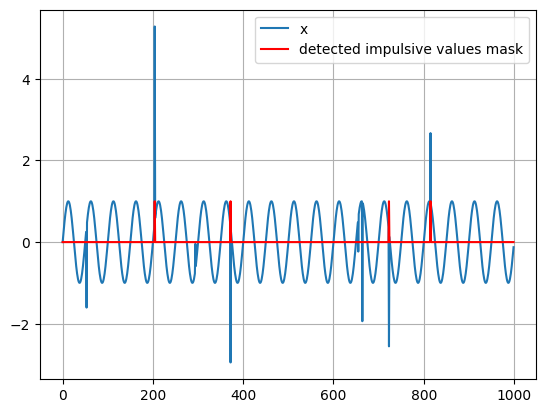

In [141]:
threshold = 2.0
mask = (np.abs(x) > threshold) # detected impulsive values mask

plt.plot(x, label='x')
plt.plot(mask, 'r', label='detected impulsive values mask')
plt.legend()
plt.grid(); plt.show()

In [142]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
np.nonzero(a < 4)

(array([0, 1, 2], dtype=int64),)

In [116]:
np.nonzero(mask)

(array([120, 442, 476, 748, 794, 880, 892], dtype=int64),)

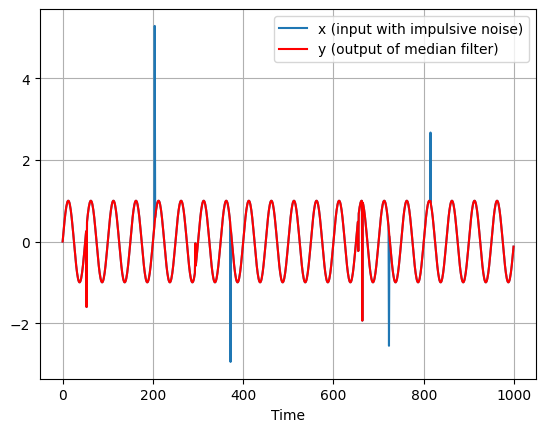

In [148]:
kernel_size = 5

x_len = len(x)
y = x.copy()

impulsive_noise_idx = np.nonzero(mask)[0]
for i in impulsive_noise_idx:
    selected = x[max(i-kernel_size//2, 0) : min(i + kernel_size//2, x_len)]
    selected_median = np.median(selected)
    y[i] = selected_median

plt.plot(x, label='x (input with impulsive noise)')
plt.plot(y, 'r', label='y (output of median filter)')
plt.xlabel('Time')
plt.legend()
plt.grid(); plt.show()

In [145]:
def median_filter(x, threshold, kernel_size=3):
    x_len = len(x)
    y = x.copy()

    mask = (np.abs(x) > threshold) # detected impulsive values mask

    impulsive_noise_idx = np.nonzero(mask)[0]
    for i in impulsive_noise_idx:
        selected = x[max(i-kernel_size//2, 0) : min(i + kernel_size//2, x_len)]
        selected_median = np.median(selected)
        y[i] = selected_median
    
    return y

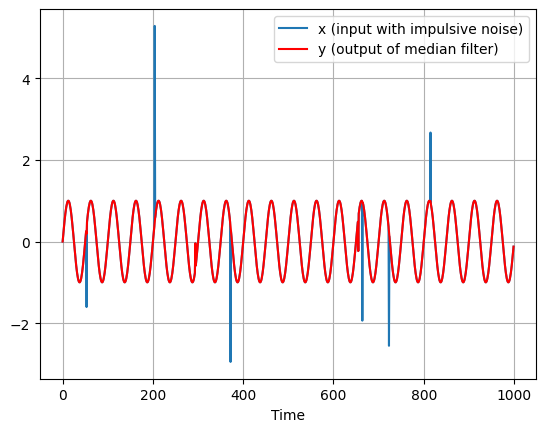

In [147]:
y = median_filter(x, threshold=1.0, kernel_size=5)

plt.plot(x, label='x (input with impulsive noise)')
plt.plot(y, 'r', label='y (output of median filter)')
plt.xlabel('Time')
plt.legend()
plt.grid(); plt.show()